In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2025_1.csv", parse_dates=["FlightDate"], low_memory=False)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

Rows = df.shape[0]
Columns = df.shape[1]
print(f"The dataset has {Rows} rows and {Columns} columns")

df.info()
df.sample(10, random_state =42)

print(f"Numerical columns: {len(num_cols)}")
print(f"Categorical columns: {len(cat_cols)}")

The dataset has 539747 rows and 109 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539747 entries, 0 to 539746
Columns: 109 entries, Year to Div5TailNum
dtypes: float64(64), int64(26), object(19)
memory usage: 448.9+ MB
Numerical columns: 90
Categorical columns: 19


In [2]:
print(df.columns.tolist())

['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline', 'DOT_ID_Reporting_Airline', 'IATA_CODE_Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk', 'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Flights', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'FirstDepTime', 'TotalAddGTime'

In [38]:
df.dtypes

Year                  int64
Quarter               int64
Month                 int64
DayofMonth            int64
DayOfWeek             int64
                     ...   
Div5WheelsOn        float64
Div5TotalGTime      float64
Div5LongestGTime    float64
Div5WheelsOff       float64
Div5TailNum         float64
Length: 109, dtype: object

In [39]:
df['FlightDate'] = pd.to_datetime(df['FlightDate'], dayfirst=True, errors='coerce')
df['Tail_Number'] = df['Tail_Number'].fillna('Unknown').str.strip().str.upper()
df['Reporting_Airline'] = df['Reporting_Airline'].str.strip().str.upper()
df = df[df['Cancelled'] == 0]
df = df[df['Diverted'] == 0]

DepDelayMinutes Skewness: 12.86
ArrDelayMinutes Skewness: 12.76
Distance Skewness: 1.47
CRSElapsedTime Skewness: 1.39


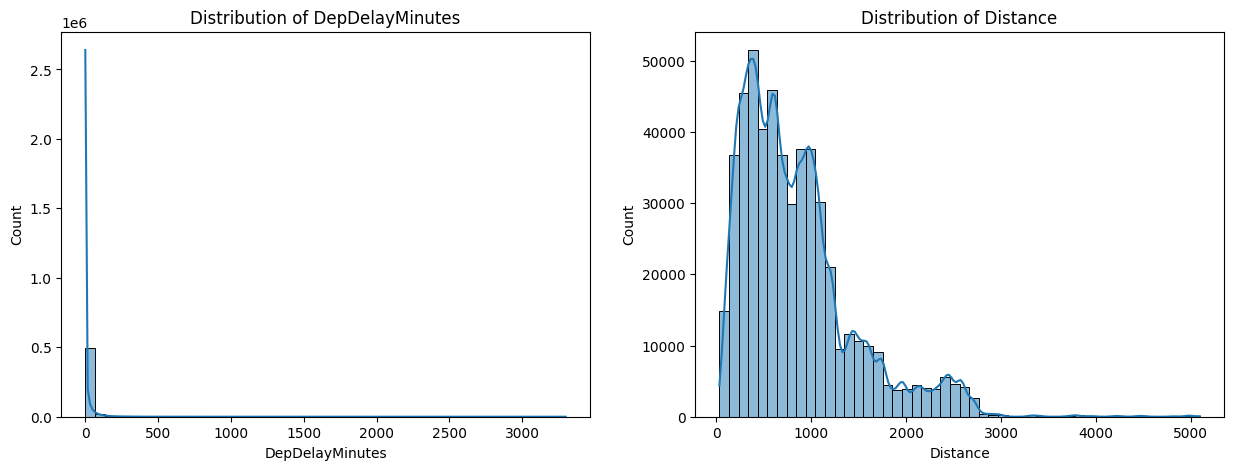

In [40]:
target_vars = ['DepDelayMinutes', 'ArrDelayMinutes', 'Distance', 'CRSElapsedTime']

for var in target_vars:
    print(f"{var} Skewness: {df[var].skew():.2f}")
plt.figure(figsize=(15, 5))
for i, var in enumerate(['DepDelayMinutes', 'Distance']):
    plt.subplot(1, 2, i+1)
    sns.histplot(df[var], kde=True, bins=50)
    plt.title(f'Distribution of {var}')
plt.show()

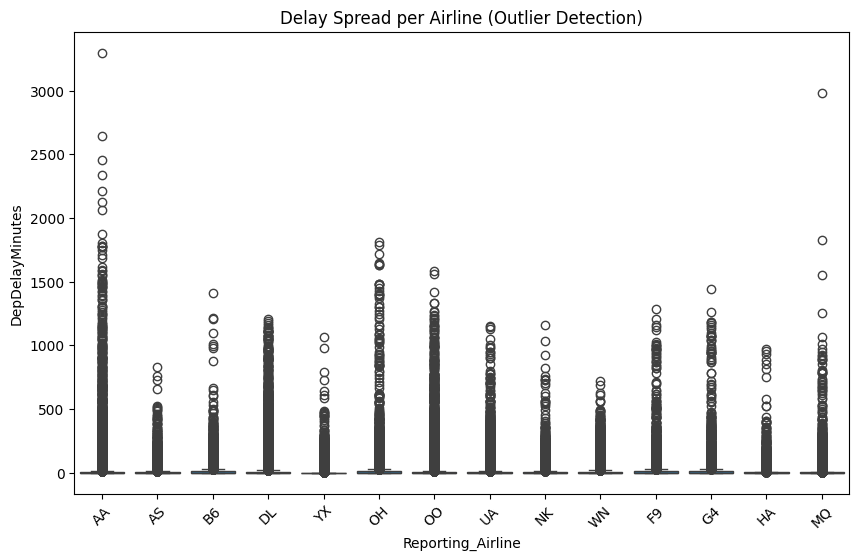

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Reporting_Airline', y='DepDelayMinutes', data=df)
plt.xticks(rotation=45)
plt.title('Delay Spread per Airline (Outlier Detection)')
plt.show()

In [42]:
unique_counts = {
    'Airlines': df['Reporting_Airline'].nunique(),
    'Origins': df['Origin'].nunique(),
    'Destinations': df['Dest'].nunique(),
    'Tail_Numbers': df['Tail_Number'].nunique()
}
print("Cardinality of Categorical Data:", unique_counts)

Cardinality of Categorical Data: {'Airlines': 14, 'Origins': 329, 'Destinations': 329, 'Tail_Numbers': 5609}


In [43]:
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing Values': missing_data,
    'Percentage (%)': missing_percent
}).sort_values(by='Percentage (%)', ascending=False)
print(missing_df[missing_df['Missing Values'] > 0])

                                    Column  Missing Values  Percentage (%)
Div4WheelsOn                  Div4WheelsOn          522269      100.000000
Div4TotalGTime              Div4TotalGTime          522269      100.000000
Div4LongestGTime          Div4LongestGTime          522269      100.000000
Div4WheelsOff                Div4WheelsOff          522269      100.000000
Div4TailNum                    Div4TailNum          522269      100.000000
Div5Airport                    Div5Airport          522269      100.000000
Div5AirportID                Div5AirportID          522269      100.000000
Div5AirportSeqID          Div5AirportSeqID          522269      100.000000
Div5TailNum                    Div5TailNum          522269      100.000000
Div5WheelsOn                  Div5WheelsOn          522269      100.000000
Div5WheelsOff                Div5WheelsOff          522269      100.000000
Div5LongestGTime          Div5LongestGTime          522269      100.000000
Div5TotalGTime           

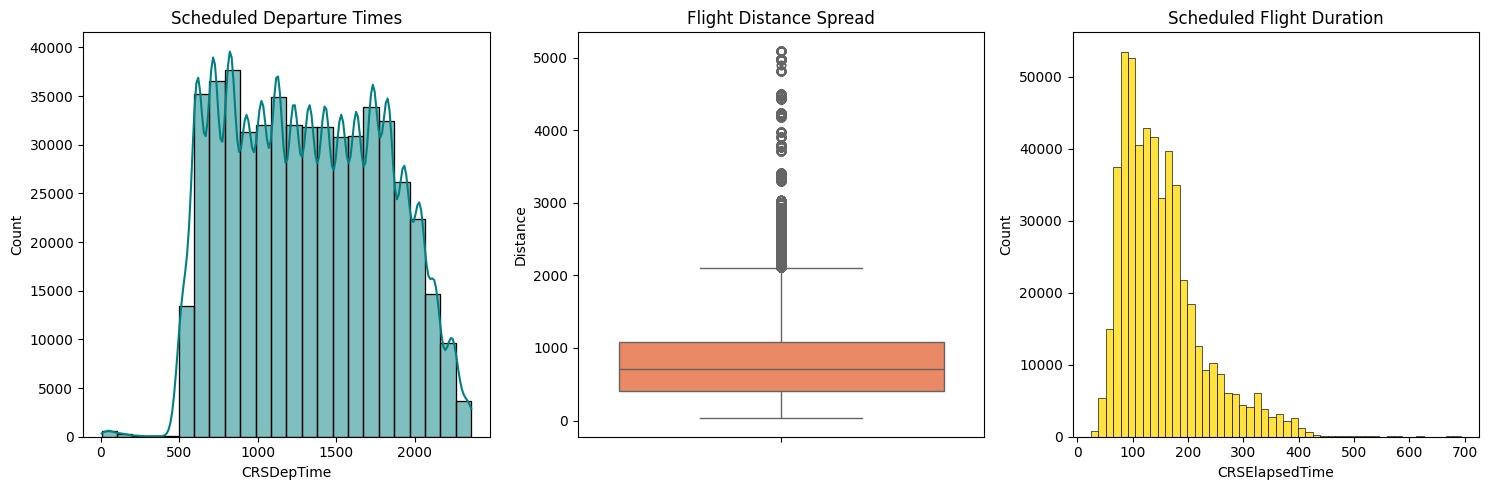

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['CRSDepTime'], bins=24, kde=True, color='teal')
plt.title('Scheduled Departure Times')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['Distance'], color='coral')
plt.title('Flight Distance Spread')

plt.subplot(1, 3, 3)
sns.histplot(df['CRSElapsedTime'], bins=50, color='gold')
plt.title('Scheduled Flight Duration')

plt.tight_layout()
plt.show()

In [57]:
keep_cols = [
    'DayofMonth', 'DayOfWeek', 'FlightDate', 
    'Reporting_Airline', 'Tail_Number', 'Origin', 'Dest', 
    'OriginState', 'DestState', 'CRSDepTime', 'CRSArrTime', 
    'CRSElapsedTime', 'Distance', 'DepDel15','ArrDelayMinutes']

df_baseline = df[keep_cols].copy()
df_baseline = df_baseline.dropna(subset=['DepDel15'])

initial_rows = len(df_baseline)
df_baseline = df_baseline.drop_duplicates(subset=['FlightDate', 'Tail_Number', 'CRSDepTime'])

print(f"Cleanup Results:")
print(f"Columns remaining: {df_baseline.shape[1]}")
print(f"Rows removed as duplicates: {initial_rows - len(df_baseline)}")
print("-" * 30)
print("REMAINING COLUMNS:")
print(df_baseline.columns.tolist())

Cleanup Results:
Columns remaining: 15
Rows removed as duplicates: 45
------------------------------
REMAINING COLUMNS:
['DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline', 'Tail_Number', 'Origin', 'Dest', 'OriginState', 'DestState', 'CRSDepTime', 'CRSArrTime', 'CRSElapsedTime', 'Distance', 'DepDel15', 'ArrDelayMinutes']


In [58]:
total_dupes = df_baseline.duplicated().sum()
logical_dupes_df = df_baseline[df_baseline.duplicated(subset=['FlightDate', 'Tail_Number', 'CRSDepTime', 'Origin'], keep=False)]

print(f"Total Exact Duplicates: {total_dupes}")
print(f"Logical Conflicts (Same Tail/Time/Origin): {len(logical_dupes_df)}")
if len(logical_dupes_df) > 0:
    print("Example of a logical duplicate:")
    print(logical_dupes_df.sort_values(['Tail_Number', 'CRSDepTime']).head(4))

Total Exact Duplicates: 0
Logical Conflicts (Same Tail/Time/Origin): 0


In [59]:
print(df_baseline.info())
print(df_baseline.head())

<class 'pandas.core.frame.DataFrame'>
Index: 522224 entries, 0 to 539745
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DayofMonth         522224 non-null  int64         
 1   DayOfWeek          522224 non-null  int64         
 2   FlightDate         522224 non-null  datetime64[ns]
 3   Reporting_Airline  522224 non-null  object        
 4   Tail_Number        522224 non-null  object        
 5   Origin             522224 non-null  object        
 6   Dest               522224 non-null  object        
 7   OriginState        522224 non-null  object        
 8   DestState          522224 non-null  object        
 9   CRSDepTime         522224 non-null  int64         
 10  CRSArrTime         522224 non-null  int64         
 11  CRSElapsedTime     522224 non-null  int64         
 12  Distance           522224 non-null  int64         
 13  DepDel15           522224 non-null  float64      

In [60]:
stats = df_baseline[['CRSDepTime', 'CRSArrTime', 'CRSElapsedTime', 'Distance']].describe()
print(stats)
delay_rate = df_baseline['DepDel15'].value_counts(normalize=True) * 100
print(f"\nDelay Rate (1) vs On-Time Rate (0):\n{delay_rate}")

          CRSDepTime     CRSArrTime  CRSElapsedTime       Distance
count  522224.000000  522224.000000   522224.000000  522224.000000
mean     1315.274895    1502.733275      151.885149     847.188038
std       479.668318     501.505169       74.142029     601.920556
min         5.000000       1.000000       25.000000      31.000000
25%       905.000000    1118.000000       96.000000     404.000000
50%      1310.000000    1524.000000      136.000000     712.000000
75%      1724.000000    1922.000000      184.000000    1085.000000
max      2359.000000    2359.000000      693.000000    5095.000000

Delay Rate (1) vs On-Time Rate (0):
DepDel15
0.0    81.799956
1.0    18.200044
Name: proportion, dtype: float64


In [61]:
cat_analysis = {
    'Airlines': df_baseline['Reporting_Airline'].nunique(),
    'Tail Numbers': df_baseline['Tail_Number'].nunique(),
    'Origins': df_baseline['Origin'].nunique(),
    'Destinations': df_baseline['Dest'].nunique()
}
print("Categorical Cardinality:", cat_analysis)

Categorical Cardinality: {'Airlines': 14, 'Tail Numbers': 5609, 'Origins': 329, 'Destinations': 329}


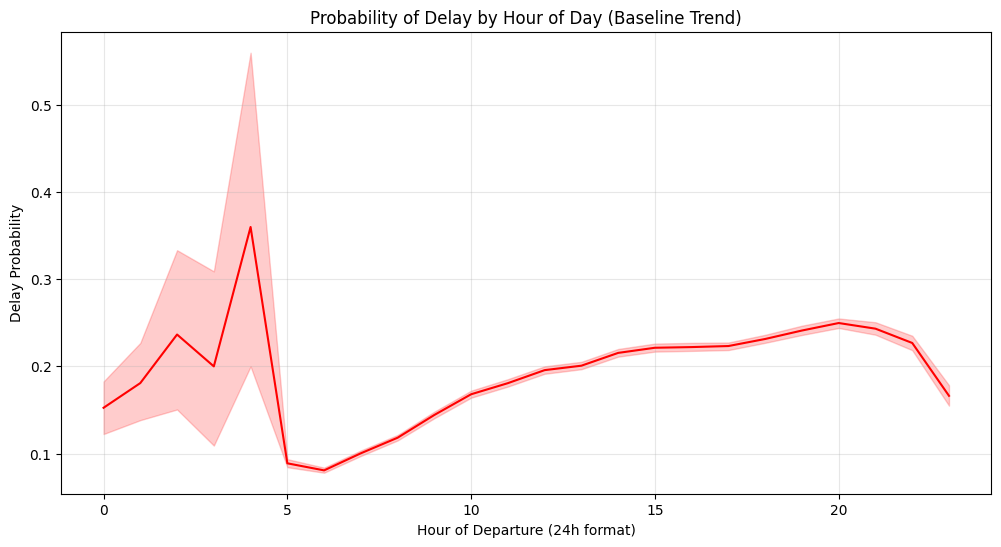

In [62]:
df_baseline['DepHour'] = (df_baseline['CRSDepTime'] // 100).astype(int)
plt.figure(figsize=(12, 6))
sns.lineplot(x='DepHour', y='DepDel15', data=df_baseline, color='red')
plt.title('Probability of Delay by Hour of Day (Baseline Trend)')
plt.ylabel('Delay Probability')
plt.xlabel('Hour of Departure (24h format)')
plt.grid(True, alpha=0.3)
plt.show()

In [63]:
circular_flights = df_baseline[df_baseline['Origin'] == df_baseline['Dest']]
print(f"Number of circular flights (Origin == Dest): {len(circular_flights)}")
if len(circular_flights) > 0:
    df_baseline = df_baseline[df_baseline['Origin'] != df_baseline['Dest']]

Number of circular flights (Origin == Dest): 0


In [64]:
state_coverage = df_baseline.groupby('OriginState')['Origin'].nunique().sort_values(ascending=False)
print(state_coverage.head(10))

OriginState
TX    25
CA    22
FL    19
AK    16
MI    14
NY    12
IL    10
CO     9
WY     9
ND     8
Name: Origin, dtype: int64


In [65]:
cols_to_drop = ['OriginState', 'DestState']
df_baseline = df_baseline.drop(columns=[c for c in cols_to_drop if c in df_baseline.columns])
for col in ['Reporting_Airline', 'Tail_Number', 'Origin', 'Dest']:
    df_baseline[col] = df_baseline[col].astype('category')
print(f"Notebook 1 Complete. Final shape: {df_baseline.shape}")


Notebook 1 Complete. Final shape: (522224, 14)


In [66]:
df_baseline.to_csv('jan_2025_sanitized.csv', index=False)
print("Notebook 1: Successfully saved to jan_2025_sanitized.csv")
print(f"Final column count: {len(df_baseline.columns)}")

Notebook 1: Successfully saved to jan_2025_sanitized.csv
Final column count: 14


In [67]:
print(df_baseline.columns)

Index(['DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline',
       'Tail_Number', 'Origin', 'Dest', 'CRSDepTime', 'CRSArrTime',
       'CRSElapsedTime', 'Distance', 'DepDel15', 'ArrDelayMinutes', 'DepHour'],
      dtype='object')
